In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from drawdata import ScatterWidget

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim

plt.style.use('../mpl styles/dracula.mplstyle')

In [2]:
widget = ScatterWidget()
widget

ScatterWidget()

In [222]:
raw_dataset = widget.data_as_pandas

In [223]:
data = raw_dataset[['x', 'y']]

In [224]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        return model(X).numpy()

In [226]:
raw_dataset.head()

,x,y,color,label
0,84.376336,91.734130,#1f77b4,a
1,82.942139,101.367567,#1f77b4,a
2,74.935003,85.651300,#1f77b4,a
3,90.164261,84.461263,#1f77b4,a
4,56.636240,73.997570,#1f77b4,a


In [227]:
scaler = StandardScaler()

data['x'] = scaler.fit_transform(data[['x']])

data.head()

C:\Users\daith\AppData\Local\Temp\ipykernel_11756\516076131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x'] = scaler.fit_transform(data[['x']])


,x,y
0,-1.512221,91.734130
1,-1.519712,101.367567
2,-1.561534,85.651300
3,-1.481990,84.461263
4,-1.657111,73.997570


<Axes: xlabel='x', ylabel='y'>

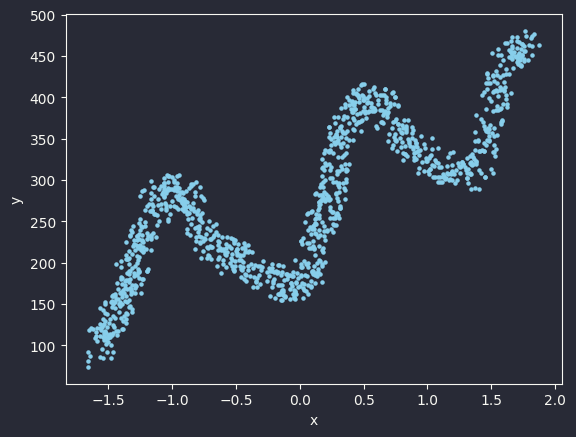

In [228]:
data.plot.scatter(x='x', y='y', marker='.', color='skyblue')

In [229]:
X = torch.tensor(data[['x']].to_numpy(), dtype=torch.float)
y = torch.tensor(data[['y']].to_numpy(), dtype=torch.float)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, len(dataset))

Epoch 1/100: Loss = 84,779.8438
Epoch 2/100: Loss = 77,017.3828
Epoch 3/100: Loss = 36,158.7188
Epoch 4/100: Loss = 17,505.2715
Epoch 5/100: Loss = 11,412.5312
Epoch 6/100: Loss = 9,362.8477
Epoch 7/100: Loss = 8,673.2959
Epoch 8/100: Loss = 8,441.3115
Epoch 9/100: Loss = 8,363.2627
Epoch 10/100: Loss = 8,337.0000
Epoch 11/100: Loss = 8,328.1582
Epoch 12/100: Loss = 8,325.1787
Epoch 13/100: Loss = 8,324.1738
Epoch 14/100: Loss = 8,323.8291
Epoch 15/100: Loss = 8,323.7109
Epoch 16/100: Loss = 8,323.6660
Epoch 17/100: Loss = 8,323.6494
Epoch 18/100: Loss = 8,323.6406
Epoch 19/100: Loss = 8,323.6348
Epoch 20/100: Loss = 8,323.6309
Epoch 21/100: Loss = 8,323.6270
Epoch 22/100: Loss = 8,323.6240
Epoch 23/100: Loss = 8,323.6201
Epoch 24/100: Loss = 8,323.6182
Epoch 25/100: Loss = 8,323.6152
Epoch 26/100: Loss = 8,323.6123
Epoch 27/100: Loss = 8,323.6104
Epoch 28/100: Loss = 8,323.6064
Epoch 29/100: Loss = 8,323.6064
Epoch 30/100: Loss = 8,323.6016
Epoch 31/100: Loss = 8,323.5996
Epoch 32/100

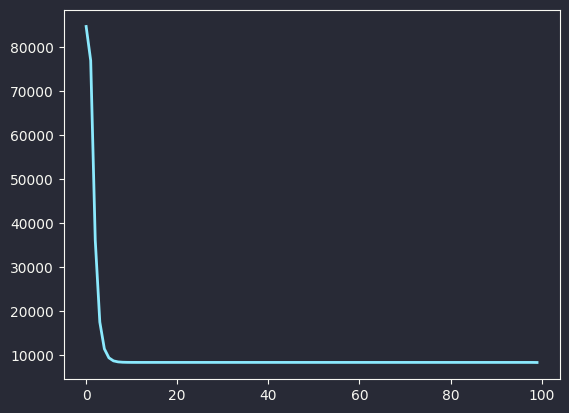

In [232]:
model = nn.Sequential(
    nn.Linear(1, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 100

losses = []
for epoch in range(1, epochs + 1):
    cost = 0
    model.train()
    for x, y in dataloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss.item()
        
    cost /= len(dataloader)
    losses.append(cost)
    print(f"Epoch {epoch}/{epochs}: Loss = {cost:,.4f}")


plt.plot(losses, linewidth=2, )

7242.076480798747


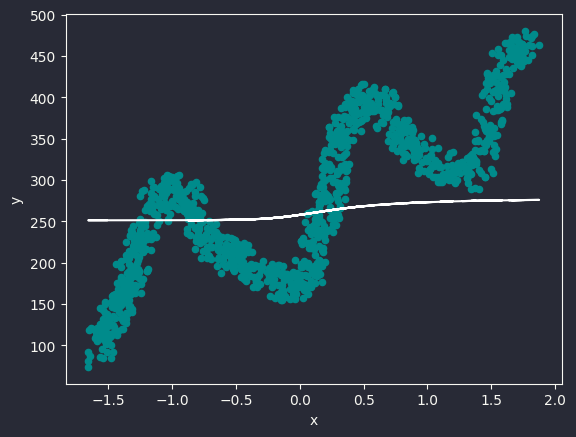

In [233]:
y_pred = predict(model, X)

print(mean_squared_error(data['y'], y_pred))

data.plot.scatter(x='x', y='y', color='darkcyan')
plt.plot(data['x'], y_pred, color='white')

In [210]:
l1_weights = model.state_dict()['0.weight']
l1_bias = model.state_dict()['0.bias']

l1_a = (l1_weights @ X.T) + l1_bias.reshape(-1, 1)
l1_a = torch.tanh(l1_a)

l2_weights = model.state_dict()['2.weight']
l2_bias = model.state_dict()['2.bias']

l2_a = l2_weights @ l1_a + l2_bias

<Axes: >

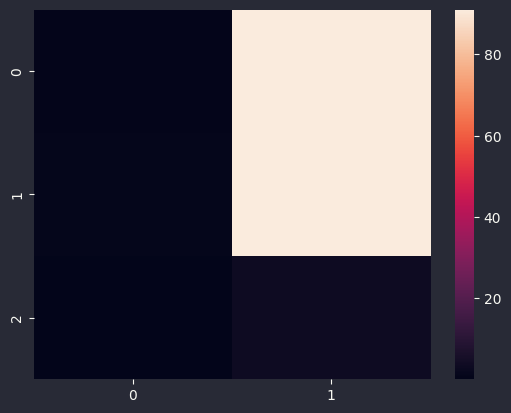

In [211]:
l1_l2_weights = torch.concat([l1_weights, l2_weights.reshape(-1, 1)], axis=1)
sns.heatmap(l1_l2_weights)

In [199]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5676],
                      [-0.9736],
                      [ 0.9228]])),
             ('0.bias', tensor([-0.0433, -0.2037, -0.5642])),
             ('2.weight', tensor([[ -0.2571,   0.4566, 146.9620]])),
             ('2.bias', tensor([146.0586]))])